In [1]:
#pip install fast_colorthief

In [2]:
#pip install webcolors

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import io
from PIL import Image
import zipfile
import fast_colorthief
import numpy as np
import webcolors

In [4]:
# inspired by:  https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
# and by: https://medium.com/codex/rgb-to-color-names-in-python-the-robust-way-ec4a9d97a01f
from scipy.spatial import KDTree

# a dictionary of all the hex and their respective names in css
# CSS3 has 147 named colors, which is too many for human interpretation.
# CSS2 has 16 colors: aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, purple, red, silver, teal, white, and yellow.

css_color_db = webcolors.CSS2_HEX_TO_NAMES #.CSS3_HEX_TO_NAMES
color_names = []
rgb_values = []
for color_hex, color_name in css_color_db.items():
    color_names.append(color_name)
    rgb_values.append(webcolors.hex_to_rgb(color_hex))
color_decodes = KDTree(rgb_values)

def convert_rgb_to_names(rgb_tuple):    
    distance, index = color_decodes.query(rgb_tuple)
    return f'closest match: {color_names[index]}'

In [5]:
def showColor(rgb, dim=25):
    img = Image.new('RGB', (dim, dim), (0, 0, 0))
    img = cv2.rectangle(np.array(img), (0, 0), (dim, dim), rgb, -1)
    plt.imshow(img)
    plt.show()

In [6]:
zipf = zipfile.ZipFile('bcj_datasets/fashion_16k_lores.zip')

In [10]:
filenames = zipf.namelist()
filenames[12000]

'fashion/images/train/Angular_Colorblock_Blouse/img_00000013.jpg'

In [12]:
samples = [x for x in filenames if 'images/train/Angular_Colorblock_Blouse/' in x][1:]
samples

['fashion/images/train/Angular_Colorblock_Blouse/img_00000013.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000012.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000060.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000067.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000072.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000065.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000054.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000055.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000056.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000053.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000020.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000035.jpg',
 'fashion/images/train/Angular_Colorblock_Blouse/img_00000032.jpg']

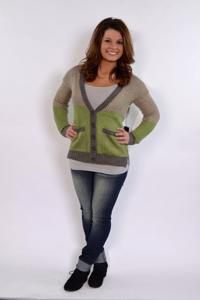

In [31]:
idx=8
img = Image.open(io.BytesIO(zipf.read(samples[idx])))
img

# <span style='color:red'>NOTE</span>
The color detection in this prototype is on the entire image.  

In the target solution, color detection will only be performed within the bounding box of the detected object.

In [32]:
#%%time
dominant_color = fast_colorthief.get_dominant_color(np.array(img.convert('RGBA')), quality=1)
print(dominant_color)
print(convert_rgb_to_names(dominant_color))

(85, 72, 59)
closest match: olive


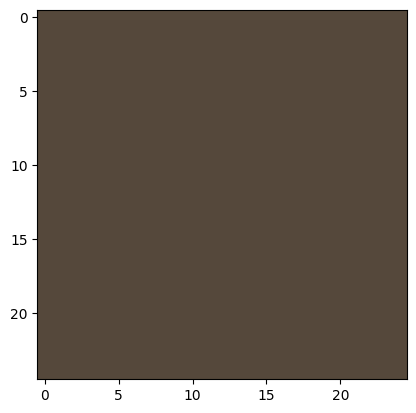

In [33]:
showColor(dominant_color)

In [34]:
color_palette = fast_colorthief.get_palette(np.array(img.convert('RGBA')), quality=1)
print([print(x, convert_rgb_to_names(x)) for x in color_palette])

(82, 71, 58) closest match: olive
(223, 218, 228) closest match: silver
(157, 144, 138) closest match: gray
(178, 116, 93) closest match: gray
(192, 185, 184) closest match: silver
(104, 105, 117) closest match: gray
(162, 163, 174) closest match: silver
(117, 108, 117) closest match: gray
(172, 164, 172) closest match: silver
[None, None, None, None, None, None, None, None, None]
